This project uses the Fish Market dataset to predict the **weight** of a fish based on features like length, height, and width using **Linear Regression**.


## 1. Importing Required Libraries

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

## 2. Loading the Dataset

In [2]:
data=pd.read_csv('fish_data.csv') # Load the dataset

In [3]:
data  

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
# Display the first 5 rows
data.head() 

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# Display the last 5 rows
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


### 2. Domain Understanding 🐟



This dataset contains physical measurements of various fish species, such as `Length`, `Height`, `Width`, and their corresponding `Weight`. The goal is to predict the **weight** of a fish using these features.

Understanding fish weight is crucial in the fisheries and aquaculture industry, where it directly impacts:
- **Pricing and Grading**: Fish are often sold based on weight, so accurate weight estimation is vital for fair pricing.
- **Inventory Management**: Helps track harvest volumes and plan logistics.
- **Sustainability and Research**: Assists researchers in analyzing growth patterns across species.

Using regression techniques on this dataset allows us to model these relationships and potentially automate fish weight estimation based on physical dimensions — useful in both manual and digital measurement systems.

Before we move to modeling, we’ll explore the data structure, check for missing values, outliers, and understand correlations through visualizations in the upcoming EDA section.


## 3. Data Visualization and Exploratory Data Analysis (EDA)


In [6]:
# Quick summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
# Statistical information of the dataset
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
# Statistical summary of categorical columns
data.describe(include='O')

,Species
count,159
unique,7
top,Perch
freq,56


In [9]:
# Count of different fish species
species_counts = data.Species.value_counts()

In [10]:
species_counts

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [11]:
# Univariate Analysis
import sweetviz as sv

 Generating an automated EDA (Exploratory Data Analysis) report using Sweetviz.
 Sweetviz helps visualize and compare datasets, highlighting distributions, correlations, 
 missing values, and other important insights in a comprehensive HTML report.


In [12]:
my_report= sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


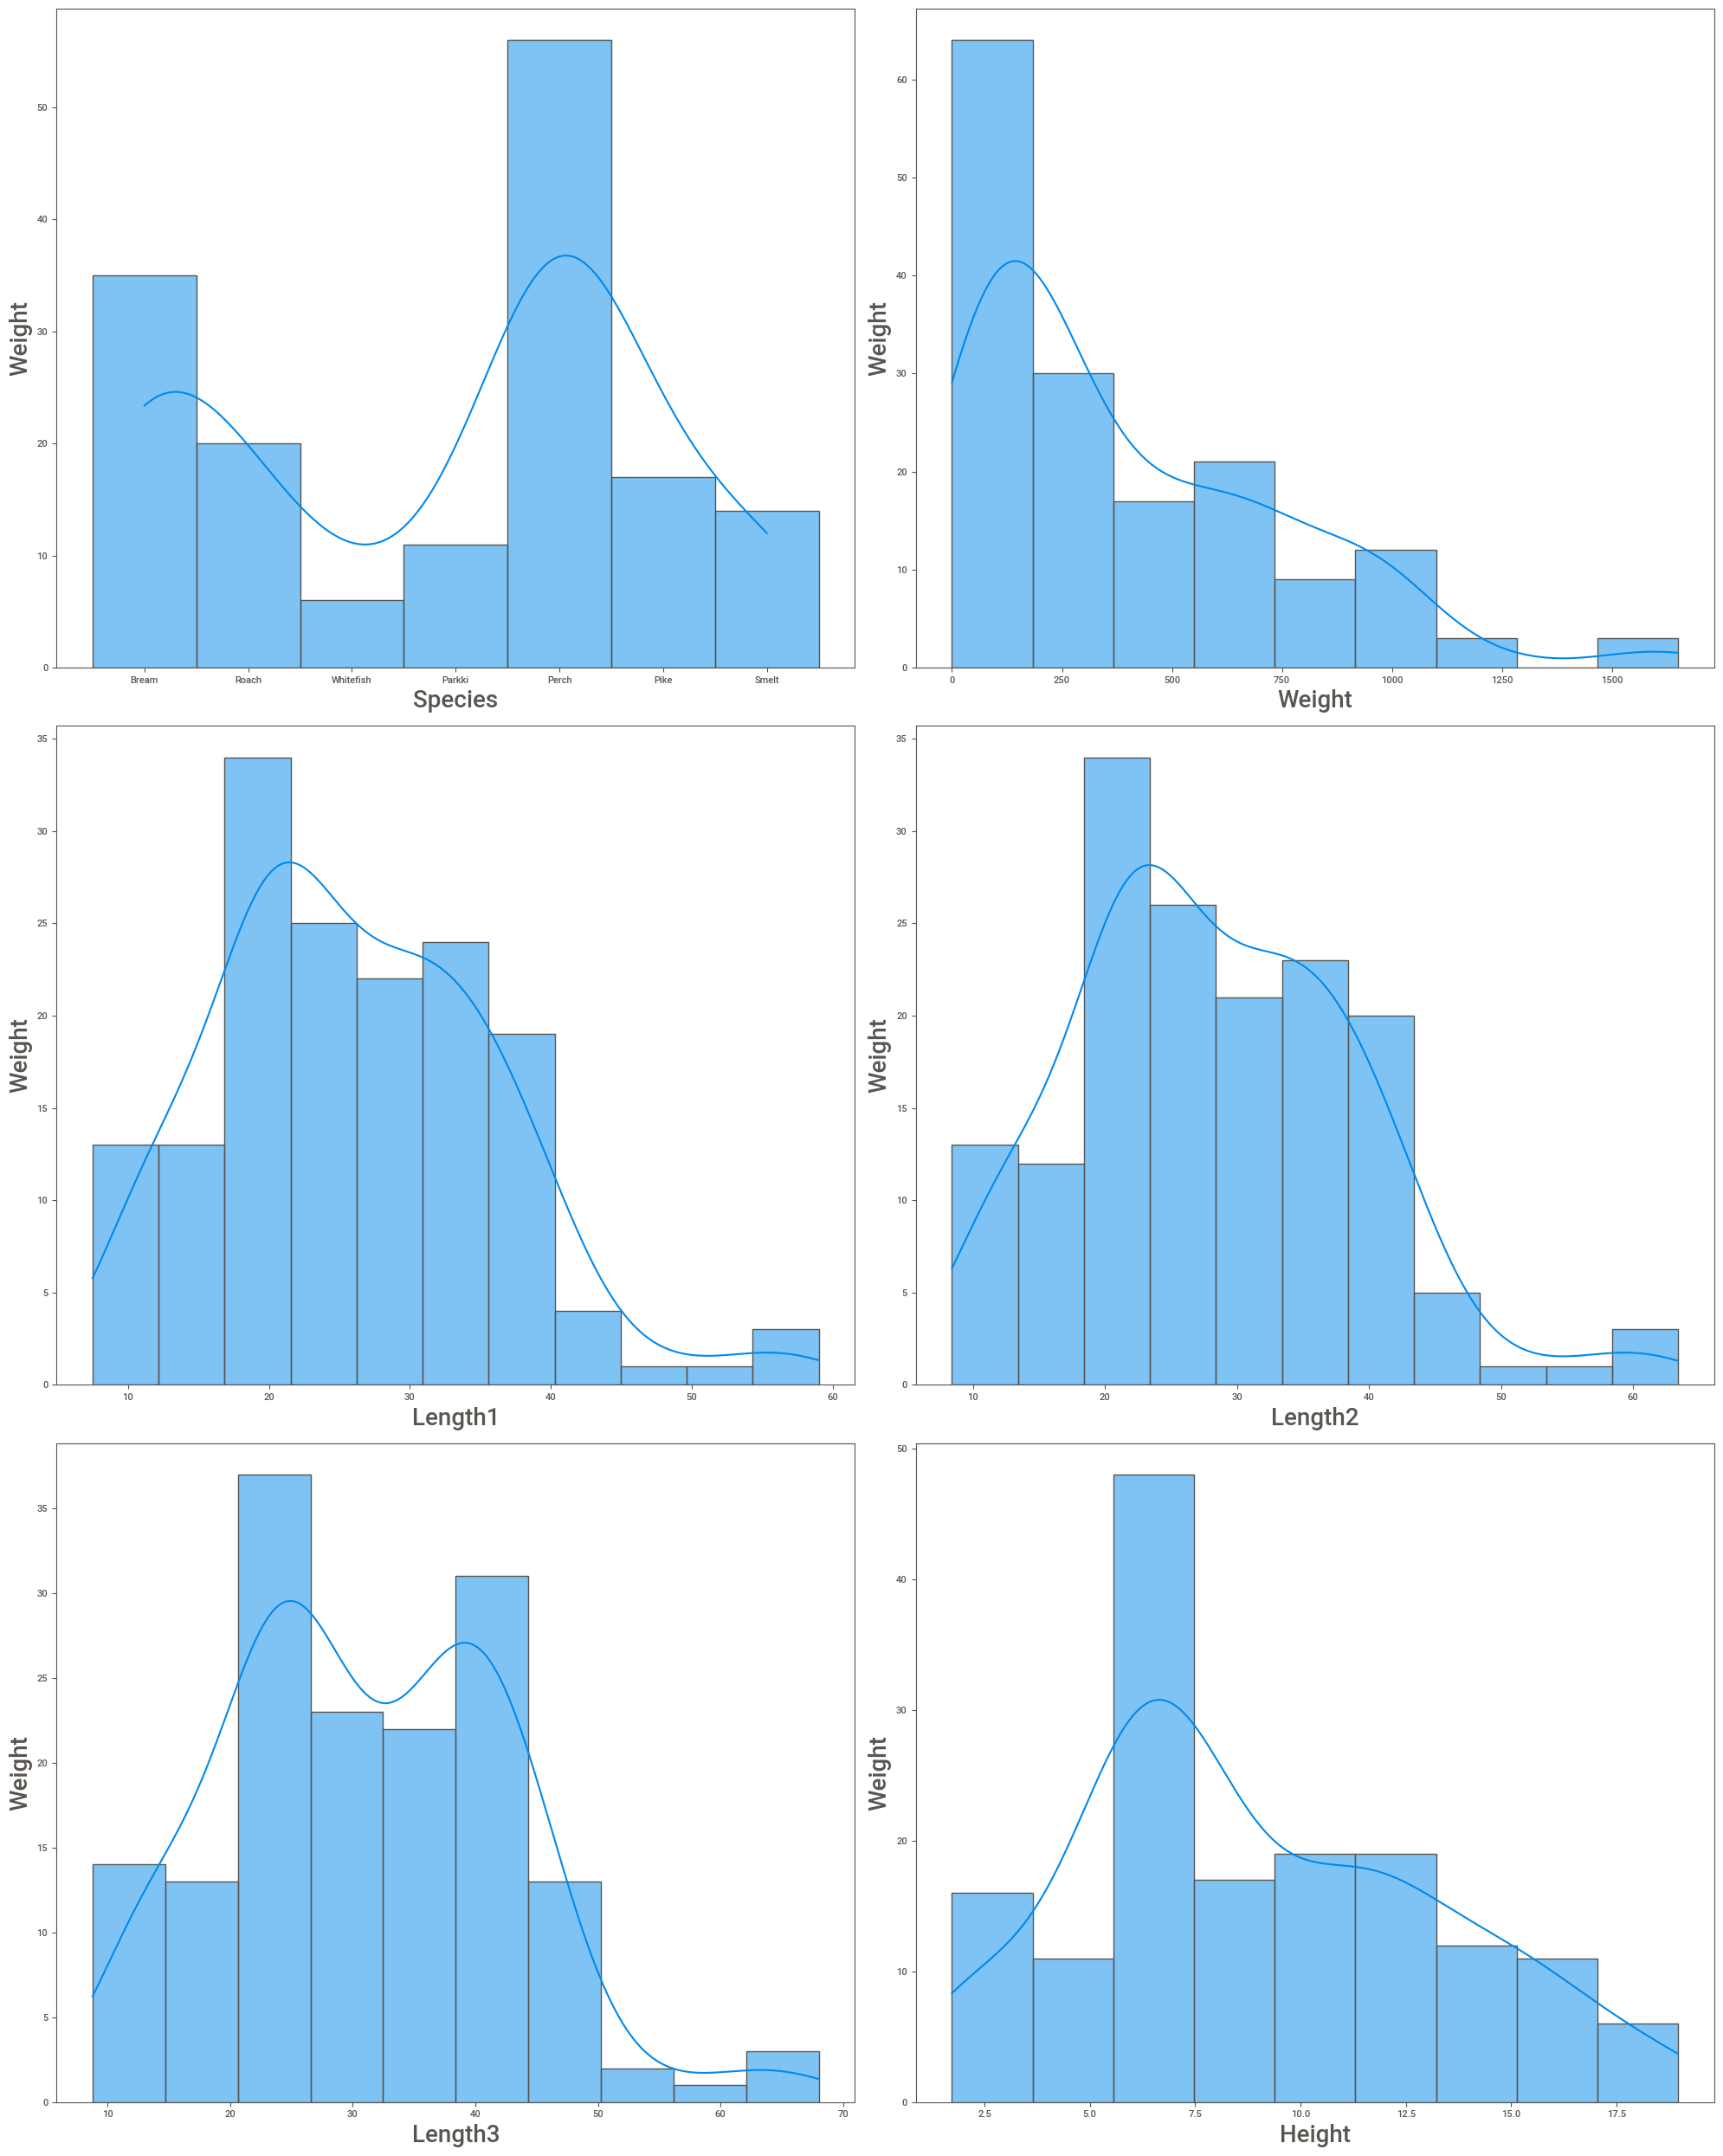

In [13]:
# Bivariate Analysis
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 6:
        ax = plt.subplot(3,2 , plotnumber)
        sns.histplot(x=data[column], kde=True)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Weight', fontsize=20)  
        plotnumber += 1

plt.tight_layout()
plt.show()

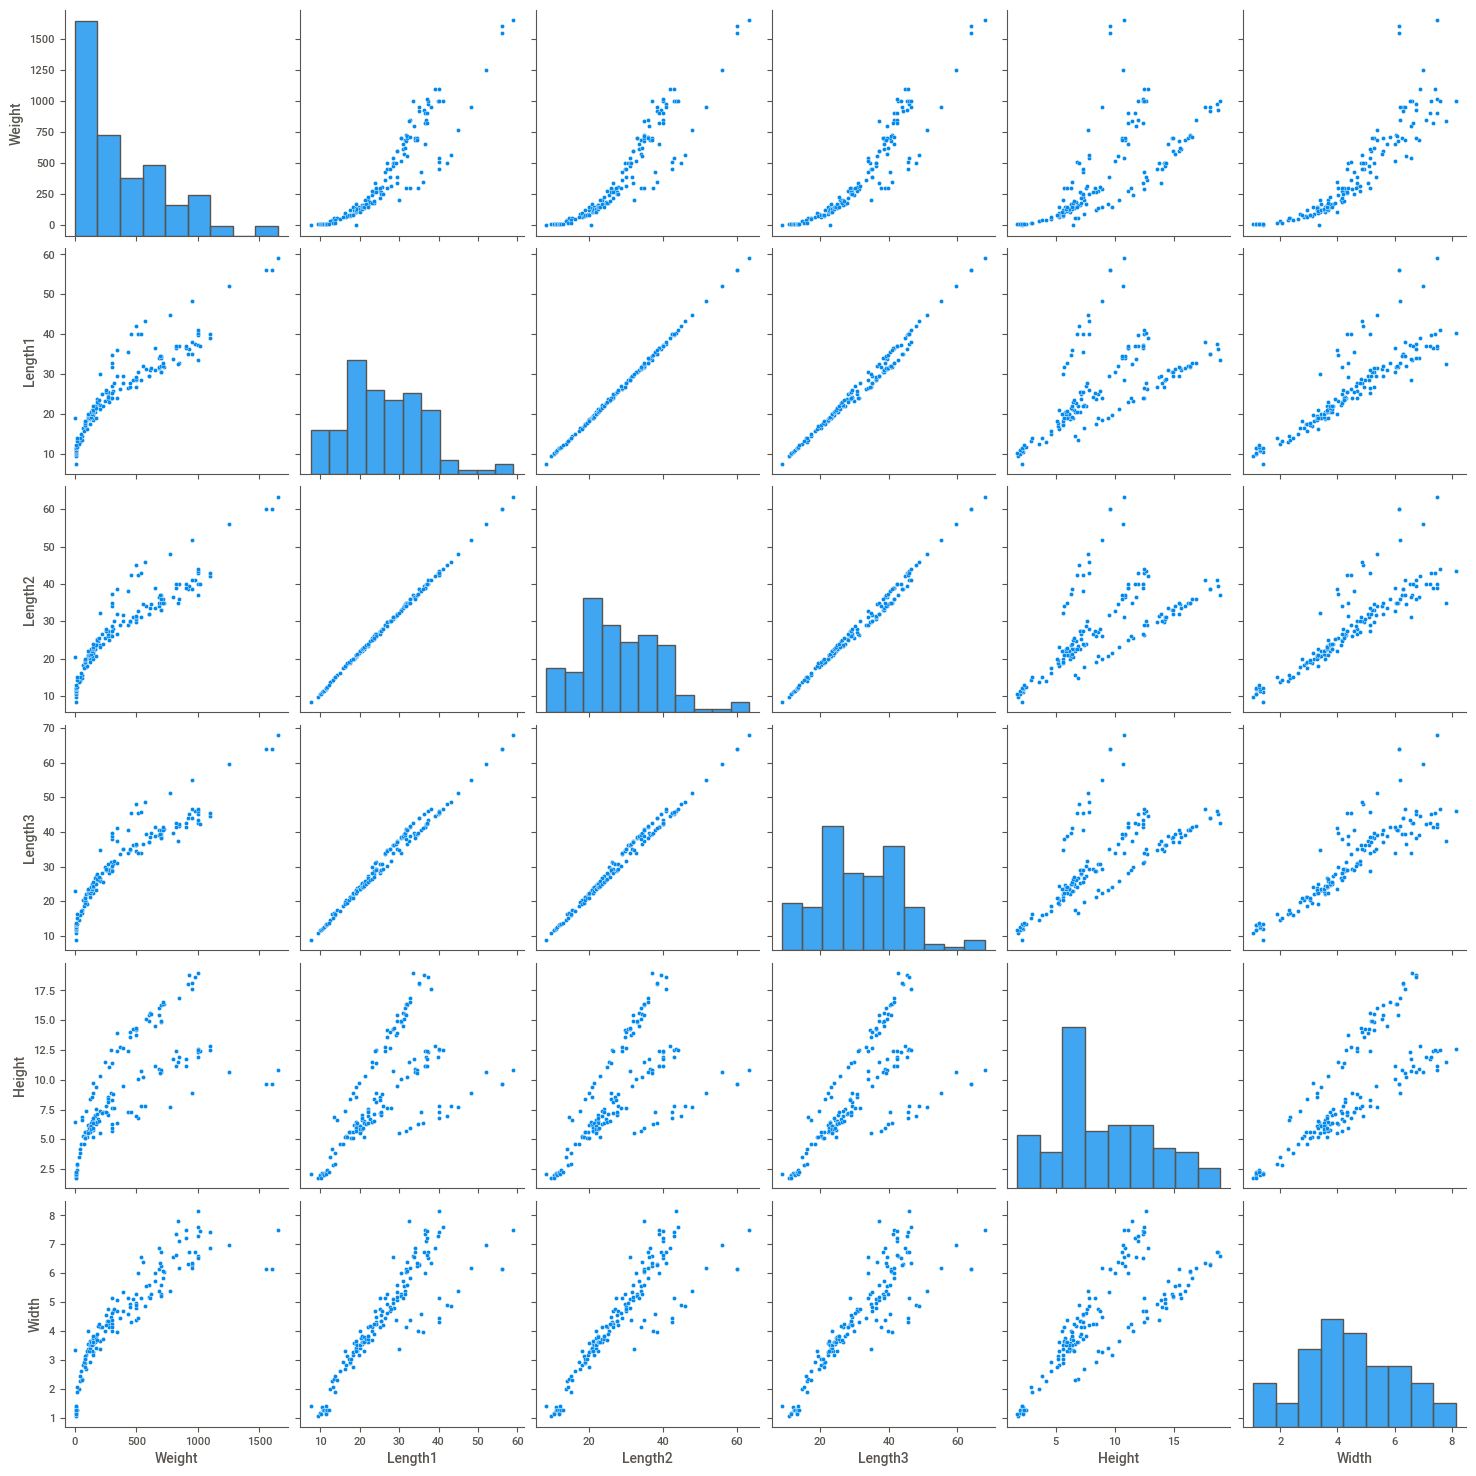

In [14]:
## Step 3 Multivariate Analysis
sns.pairplot(data)


## 4. Data Preprocessing


In [15]:
# Checking missing values in each column
data.isnull().sum() 


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [16]:
# checking shape of the dataset
data.shape 

(159, 7)

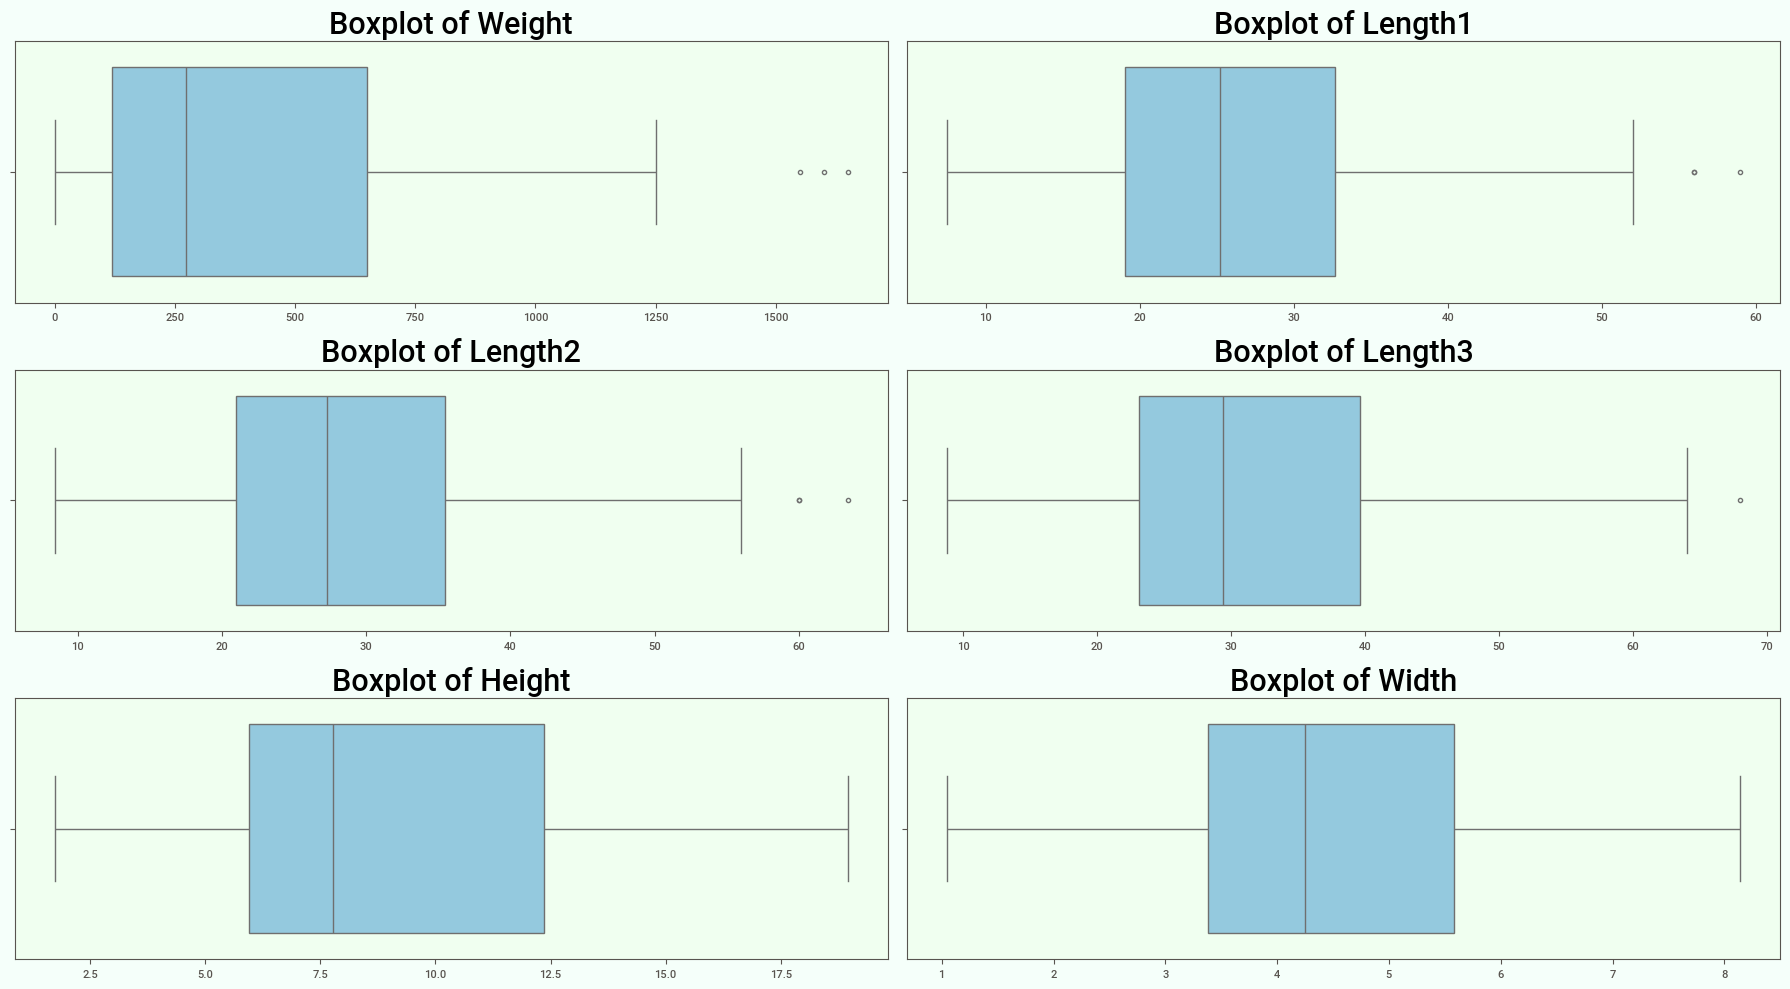

In [17]:
# Boxplots: Visualize outliers and data distribution

plt.figure(figsize=(18, 10), facecolor='mintcream')  # Entire figure background
plotnumber = 1

for column in data.columns:
    if column == 'Species':  # Skip non-numeric column
        continue
    
    ax = plt.subplot(3, 2, plotnumber)
    ax.set_facecolor('honeydew')  # Background of each plot panel
    sns.boxplot(x=data[column], color='skyblue', ax=ax)
    plt.title(f'Boxplot of {column}', fontsize=22)
    plt.xlabel('')
    plotnumber += 1

plt.tight_layout()
plt.show()


 Removing outliers from Weight, Length1, Length2, and Length3 columns


In [18]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from multiple columns
for col in ['Weight', 'Length1', 'Length2', 'Length3']:
    data = remove_outliers_iqr(data, col)

# View cleaned data
data.reset_index(drop=True, inplace=True)
data.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### 🧹 Removing Outliers Using the IQR Method

Outliers can negatively impact model performance. To clean our dataset, we apply the **Interquartile Range (IQR)** method to detect and remove outliers from key numerical columns: `Weight`, `Length1`, `Length2`, and `Length3`.

**IQR Formula:**
- Q1 = 25th percentile
- Q3 = 75th percentile
- IQR = Q3 - Q1
- Outliers are values outside the range:  
  `[Q1 - 1.5 × IQR, Q3 + 1.5 × IQR]`

We define a function `remove_outliers_iqr()` and apply it to each column to retain only the data points within this valid range.


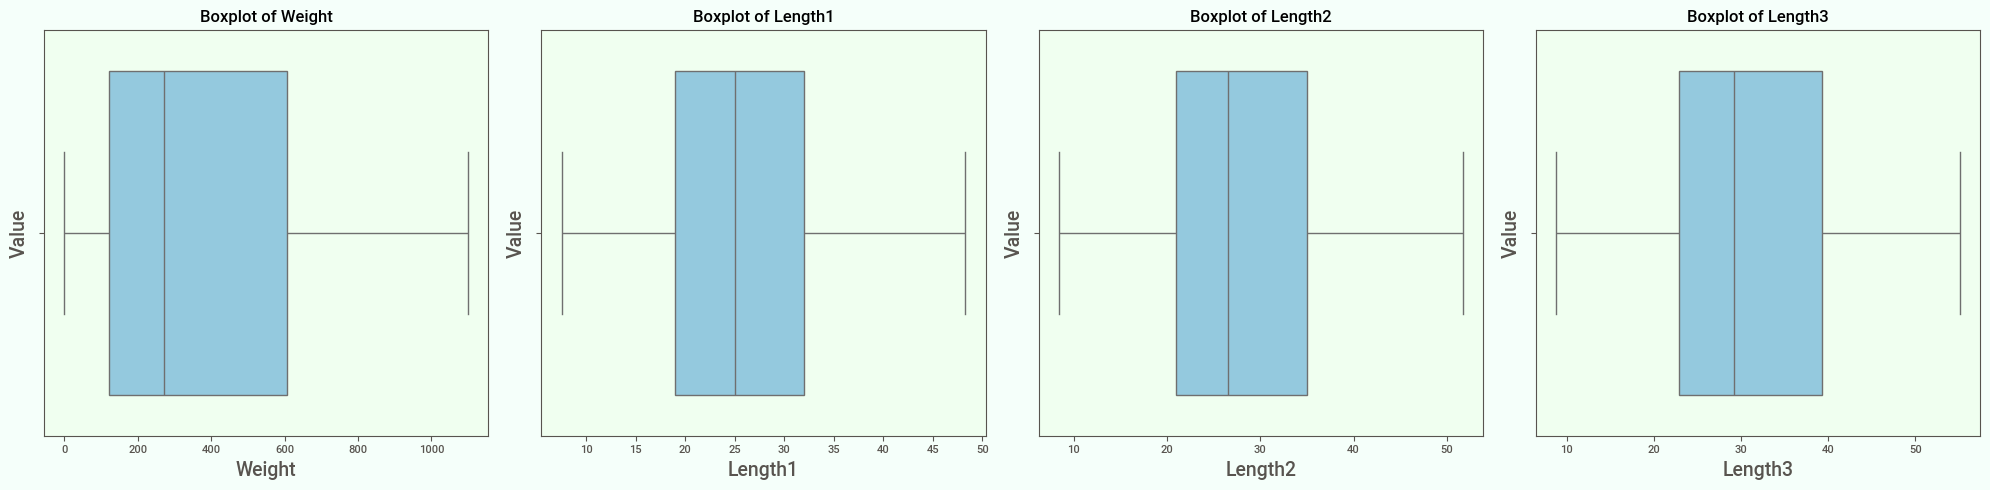

In [19]:
# Specific columns to plot
columns_to_plot = ['Weight', 'Length1', 'Length2', 'Length3']

# Create wide figure with a mintcream background
plt.figure(figsize=(20, 5), facecolor='mintcream')
plotnumber = 1

for column in columns_to_plot:
    ax = plt.subplot(1, 4, plotnumber)
    ax.set_facecolor('honeydew')  # Each subplot background
    sns.boxplot(x=data[column], color='skyblue', ax=ax)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plotnumber += 1

plt.tight_layout()
plt.show()

 Outliers successfully removed; data is now clean shown in the boxplots 


In [20]:
print(data.columns)


Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')


We use "One-Hot Encoding" instead of 'Label Encoding' because it avoids creating a false ordinal relationship between categories, which can mislead regression models.


In [21]:
# One Hot Encoding for the categorical data
data = pd.get_dummies(data, columns=['Species'], drop_first=True)


In drop_first=True, the first category (alphabetically) is dropped to prevent multicollinearity in regression models.

In [22]:
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,False,False,False,False,False,False


In [23]:
data.tail()

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
150,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,True,False
151,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,True,False
152,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,True,False
153,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,True,False
154,19.9,13.8,15.0,16.2,2.9322,1.8792,False,False,False,False,True,False


In [24]:
data.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

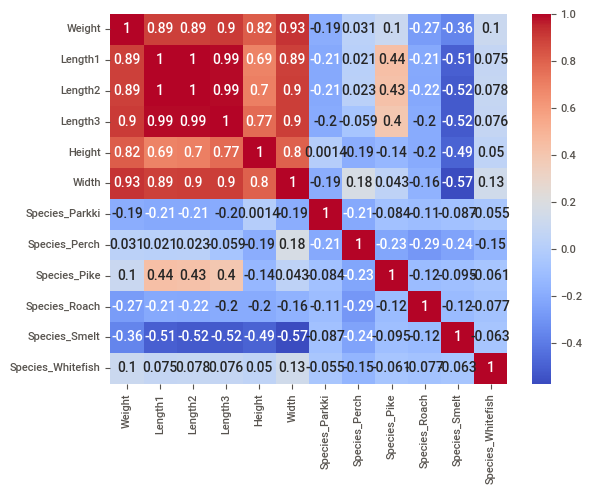

In [25]:
# Heatmap to show correlations between numerical features
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


Plotting a heatmap to visualize the correlation between numerical features.
This helps identify which features are strongly correlated with the target variable 'Weight',
 so we can select the most relevant predictors for modeling.

## 5. Model Training


## 5.1 Split data

In [26]:
# Importing the train_test_split function
from sklearn.model_selection import train_test_split

X = data.drop('Weight', axis=1)  # features
y = data['Weight']              # target

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.2 Train Linear Regression

In [27]:
# Importing Linear Regression model from sklearn
from sklearn.linear_model import LinearRegression

# Creating an instance of the Linear Regression model
model = LinearRegression()
# Fitting the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [28]:
# Predicting the target values for the test set
y_pred = model.predict(X_test)


## 5.3 Feature Importance Visualization

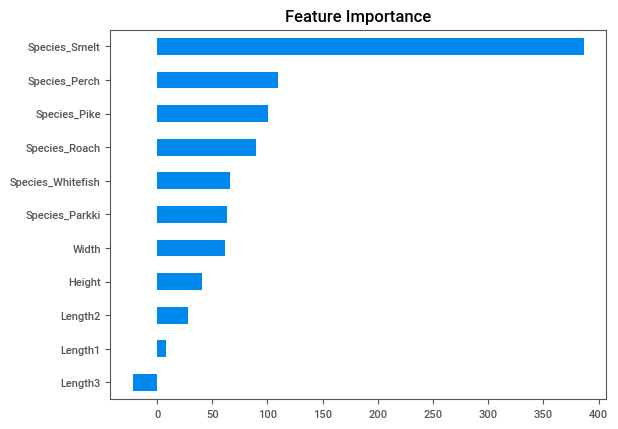

In [34]:
importance = pd.Series(model.coef_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()


Feature importance shows how much each input contributes to the prediction. Here, Length1 and Length3 have higher influence on weight.


## 6. Model Evaluation

In [29]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error

# R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)  # How well the model explains the variance

# Adjusted R-squared
n = X_test.shape[0]  # samples
k = X_test.shape[1]  # features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("\nAdjusted R-squared:", adjusted_r2)  # R-squared adjusted for number of features

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)  # Average squared error

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("\nRoot Mean Squared Error:", rmse)  # RMSE in same unit as target variable


R-squared: 0.957068250387663

Adjusted R-squared: 0.9322130269278889

Mean Squared Error: 4941.831373693405

Root Mean Squared Error: 70.29816052851885


 The model shows strong performance with an R-squared of 0.95 and an Adjusted R-squared of 0.93.
The low MSE (4941.83) and RMSE (70.30) indicate that the model predictions are close to the actual values.


## 7. Actual vs Predicted Plot

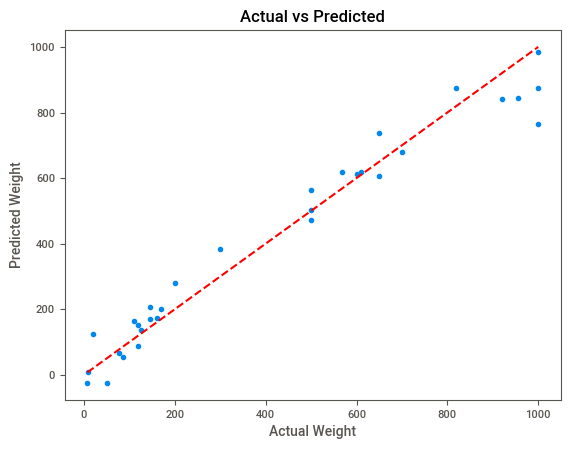

In [30]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


This draws a diagonal red dashed line ('r--') which represents the perfect predictions line:
If all your predictions were perfect, every point would lie on this line.
The line goes from the minimum to maximum of actual values.

If points lie close to the red line, your model is predicting well.
If they are far from the line, the model is making errors.

🔴 Red Dashed Line:
This is the "perfect prediction line".

It is a reference line where:

Predicted Value=Actual Value
If your model's prediction was 100% perfect, all blue dots would lie exactly on this red line.

It runs diagonally from the bottom-left (0,0) to the top-right (max actual, max predicted).

🔵 Blue Dots:
Each blue dot is a data point that shows:

X-axis (Actual Weight): The true value from your dataset.

Y-axis (Predicted Weight): The value your model predicted.

## 8. Conclusion



In this project, we built and evaluated a Linear Regression model to predict the weight of fish based on various physical features such as length, height, and width.

### Key Takeaways:
- After preprocessing and removing outliers, the model showed a strong linear relationship between features and target.
- Evaluation metrics like R² score, MAE, and RMSE indicated that the model performs well on unseen test data.
- The Actual vs Predicted plot confirmed that predictions are close to real values for most instances.

This analysis can help fisheries or sellers estimate fish weight based on easily measurable dimensions. Further improvements can be achieved by trying more advanced models or feature engineering.
